# **Limpieza de Datos - Migración Colombia 2020-2025**

**Autor:**
- Julieth Shirley Cruz Posada

**Fecha:** 21/11/2025

---

Se realiza la limpieza y preparación de datos del archivo `migracion_colombia_2020_2025.csv`


## 1. Importación de Librerías


In [126]:
# Subir archivo csv desde tu computadora
from google.colab import files
uploaded = files.upload()

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
pd.set_option('display.max_columns', None)
plt.style.use('default')


Saving migracion_colombia_2020_2025.csv to migracion_colombia_2020_2025 (3).csv


## 2. Carga de Datos


In [127]:
# Leer el archivo CSV
df = pd.read_csv("migracion_colombia_2020_2025.csv")

print("Archivo cargado")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")


Archivo cargado
Filas: 5000, Columnas: 6


## 3. Exploración Inicial de los Datos


In [128]:
# Ver las primeras filas
print(df.head(10))


             Nombre  Edad       Ciudad Nacionalidad Fecha_registro  \
0  Carlos Rodríguez     8  Bucaramanga    Venezuela     2023-12-27   
1    Marta Castillo     9      Cúcuta@      Ecuador     2023-06-05   
2     Jorge Herrera    35       Bogotá         Perú     2025-09-21   
3       María Lopez    26       Cúcuta      Ecuador     2025-09-30   
4       María Lopez    36     Medellín      Ecuador     2022-07-17   
5    Marta Castillo    24         Cali    Venezuela     2023-09-07   
6        Juan Pérez    50     Medellín     Colombia     2023-12-25   
7     Jorge Herrera    24     Medellín         Perú     2020-08-16   
8      Sofía Torres    35     Medellín     Colombia     2022-06-13   
9    Marta Castillo    77       Bogotá         Perú     2020-05-15   

               Frontera  
0               Leticia  
1    Norte de Santander  
2            La Guajira  
3  Aeropuerto El Dorado  
4               Vichada  
5               Leticia  
6                Arauca  
7               Letic

In [129]:
# Información del DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nombre          5000 non-null   object
 1   Edad            5000 non-null   int64 
 2   Ciudad          5000 non-null   object
 3   Nacionalidad    5000 non-null   object
 4   Fecha_registro  5000 non-null   object
 5   Frontera        5000 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [130]:
# Valores nulos por columna
print(df.isnull().sum())


Nombre            0
Edad              0
Ciudad            0
Nacionalidad      0
Fecha_registro    0
Frontera          0
dtype: int64


In [131]:
# Ver nombres de columnas
print(df.columns)

# Ver tipos de datos
print(df.dtypes)

# Ver valores únicos por columna categórica
for col in df.select_dtypes(include='object'):
    print(f"\nValores únicos en '{col}':")
    print(df[col].unique())


Index(['Nombre', 'Edad', 'Ciudad', 'Nacionalidad', 'Fecha_registro',
       'Frontera'],
      dtype='object')
Nombre            object
Edad               int64
Ciudad            object
Nacionalidad      object
Fecha_registro    object
Frontera          object
dtype: object

Valores únicos en 'Nombre':
['Carlos Rodríguez' 'Marta Castillo' 'Jorge Herrera' 'María Lopez'
 'Juan Pérez' 'Sofía Torres' 'Luisa Morales' 'Ana Martínez'
 'Andrés Rivera' 'Carlos Rodríguez#' 'Pedro Gómez' 'Andrés Rivera?'
 'Carlos Rodríguez%' 'Marta Castillo!' 'Luisa Morales!' 'Juan Pérez$'
 'Marta Castillo$' 'Sofía Torres%' 'Carlos Rodríguez@' 'María Lopez@'
 'Marta Castillo@' 'Sofía Torres*' 'Jorge Herrera!' 'Andrés Rivera#'
 'Ana Martínez#' 'Carlos Rodríguez*' 'Jorge Herrera#' 'Jorge Herrera?'
 'Juan Pérez#' 'Ana Martínez?' 'Juan Pérez%' 'Jorge Herrera%'
 'Pedro Gómez#' 'Juan Pérez!' 'Marta Castillo#' 'Carlos Rodríguez$'
 'Ana Martínez@' 'Luisa Morales%' 'Carlos Rodríguez!' 'Luisa Morales#'
 'Andrés Rivera%' 'M

## 4. Limpieza de Datos


### 4.1. Limpieza de Nombre


In [132]:
# Crear copia para trabajar
df_clean = df.copy()

# Limpiar nombres: eliminar espacios y caracteres especiales
df_clean['Nombre'] = df_clean['Nombre'].astype(str).str.strip()
caracteres_especiales = ['#', '@', '$', '%', '!', '?', '*']
for char in caracteres_especiales:
    df_clean['Nombre'] = df_clean['Nombre'].str.rstrip(char)

# Reemplazar valores vacíos o inválidos con NaN
# Estos valores se identificaron explorando los datos únicos de la columna
valores_invalidos_nombre = ['', 'nan', 'NaN', 'None']
df_clean['Nombre'] = df_clean['Nombre'].replace(valores_invalidos_nombre, np.nan)

# Capitalizar nombres correctamente
df_clean['Nombre'] = df_clean['Nombre'].str.title()

print(f"Valores nulos en Nombre: {df_clean['Nombre'].isnull().sum()}")
print(f"Ejemplos de nombres limpiados: {df_clean['Nombre'].dropna().head(5).tolist()}")


Valores nulos en Nombre: 0
Ejemplos de nombres limpiados: ['Carlos Rodríguez', 'Marta Castillo', 'Jorge Herrera', 'María Lopez', 'María Lopez']


### 4.2. Limpieza de Edad


In [133]:
# Limpiar edad
df_clean['Edad'] = df_clean['Edad'].astype(str).str.strip()

# Valores inválidos identificados en la exploración inicial:
# - Valores vacíos o nulos como string: '', 'nan', 'NaN', 'None'
valores_invalidos_edad = ['', 'nan', 'NaN', 'None', 'treinta', 'Treinta', 'TREINTA', 'veinte', 'Veinte']
df_clean['Edad'] = df_clean['Edad'].replace(valores_invalidos_edad, np.nan)

# Convertir a numérico (coerce convierte errores a NaN)
df_clean['Edad'] = pd.to_numeric(df_clean['Edad'], errors='coerce')

# Eliminar edades inválidas: negativas, cero, o mayores a 120 años
df_clean['Edad'] = df_clean['Edad'].apply(lambda x: np.nan if (pd.isna(x) or x <= 0 or x > 120) else x)

print(f"Valores nulos en Edad: {df_clean['Edad'].isnull().sum()}")
print(df_clean['Edad'].describe())


Valores nulos en Edad: 0
count    5000.00000
mean       40.80380
std        23.34681
min         1.00000
25%        20.00000
50%        41.00000
75%        61.00000
max        80.00000
Name: Edad, dtype: float64


### 4.3. Limpieza de Ciudad


In [134]:
# Limpiar ciudad
df_clean['Ciudad'] = df_clean['Ciudad'].astype(str).str.strip()
caracteres_especiales = ['#', '@', '$', '%', '!', '?', '*']
for char in caracteres_especiales:
    df_clean['Ciudad'] = df_clean['Ciudad'].str.rstrip(char)

# Estandarizar nombres de ciudades
# Mapeo creado identificando variaciones en los valores únicos de la columna:
ciudad_mapping = {
    'CALI': 'Cali', 'Cali ': 'Cali',
    'BOGOTÁ': 'Bogotá', 'BOGOTA': 'Bogotá', 'Bogota': 'Bogotá',
    'CÚCUTA': 'Cúcuta', 'CUCUTA': 'Cúcuta', 'Cucuta': 'Cúcuta', 'Cúcuta ': 'Cúcuta',
    'Barranquilla ': 'Barranquilla', 'BARRANQUILLA': 'Barranquilla',
    'BUCARAMANGA': 'Bucaramanga', 'Bucaramanga ': 'Bucaramanga',
    'CARTAGENA': 'Cartagena', 'CARTAGENA ': 'Cartagena',
    'MEDELLÍN': 'Medellín', 'MEDELLIN': 'Medellín', 'Medellin': 'Medellín'
}
df_clean['Ciudad'] = df_clean['Ciudad'].replace(ciudad_mapping)
df_clean['Ciudad'] = df_clean['Ciudad'].replace(['', 'nan', 'NaN', 'None'], np.nan)

print(f"Valores únicos en Ciudad: {df_clean['Ciudad'].nunique()}")
print(df_clean['Ciudad'].value_counts().head(10))


Valores únicos en Ciudad: 7
Ciudad
Cúcuta          751
Bogotá          727
Cali            727
Medellín        705
Bucaramanga     698
Barranquilla    698
Cartagena       694
Name: count, dtype: int64


### 4.4. Limpieza de Nacionalidad


In [135]:
# Limpiar nacionalidad
df_clean['Nacionalidad'] = df_clean['Nacionalidad'].astype(str).str.strip()
df_clean['Nacionalidad'] = df_clean['Nacionalidad'].replace(['', 'nan', 'NaN', 'None'], np.nan)

# Estandarizar nombres de países
nacionalidad_mapping = {
    'venezuela': 'Venezuela', 'ecuador': 'Ecuador',
    'perú': 'Perú', 'peru': 'Perú', 'colombia': 'Colombia'
}
df_clean['Nacionalidad'] = df_clean['Nacionalidad'].replace(nacionalidad_mapping)

print(f"Valores únicos en Nacionalidad: {df_clean['Nacionalidad'].nunique()}")
print(df_clean['Nacionalidad'].value_counts())


Valores únicos en Nacionalidad: 4
Nacionalidad
Venezuela    1300
Colombia     1267
Ecuador      1250
Perú         1183
Name: count, dtype: int64


### 4.5. Limpieza de Fecha_registro


In [136]:
# Convertir fecha a datetime
df_clean['Fecha_registro'] = pd.to_datetime(df_clean['Fecha_registro'], errors='coerce')

# Eliminar fechas fuera del rango esperado (2020-2025)
df_clean['Año'] = df_clean['Fecha_registro'].dt.year
df_clean.loc[~df_clean['Año'].between(2020, 2025), 'Fecha_registro'] = np.nan

# Recrear columnas de año, mes y día
df_clean['Año'] = df_clean['Fecha_registro'].dt.year
df_clean['Mes'] = df_clean['Fecha_registro'].dt.month
df_clean['Dia'] = df_clean['Fecha_registro'].dt.day

print(f"Valores nulos en Fecha_registro: {df_clean['Fecha_registro'].isnull().sum()}")
print(f"Rango de fechas: {df_clean['Fecha_registro'].min()} a {df_clean['Fecha_registro'].max()}")
print("\nRegistros por año:")
print(df_clean['Año'].value_counts().sort_index())


Valores nulos en Fecha_registro: 0
Rango de fechas: 2020-01-01 00:00:00 a 2025-12-31 00:00:00

Registros por año:
Año
2020    870
2021    815
2022    761
2023    870
2024    854
2025    830
Name: count, dtype: int64


### 4.6. Limpieza de Frontera


In [137]:
# Limpiar frontera
df_clean['Frontera'] = df_clean['Frontera'].astype(str).str.strip()
caracteres_especiales = ['#', '@', '$', '%', '!', '?', '*']
for char in caracteres_especiales:
    df_clean['Frontera'] = df_clean['Frontera'].str.rstrip(char)

df_clean['Frontera'] = df_clean['Frontera'].replace(['', 'nan', 'NaN', 'None'], np.nan)

# Estandarizar nombres de fronteras
frontera_mapping = {
    'Vichada ': 'Vichada', 'vichada': 'Vichada',
    'Leticia ': 'Leticia', 'La Guajira ': 'La Guajira',
    'Norte de Santander ': 'Norte de Santander', 'norte de santander': 'Norte de Santander',
    'Arauca ': 'Arauca',
    'Aeropuerto El Dorado ': 'Aeropuerto El Dorado', 'aeropuerto el dorado': 'Aeropuerto El Dorado'
}
df_clean['Frontera'] = df_clean['Frontera'].replace(frontera_mapping)

print(f"Valores únicos en Frontera: {df_clean['Frontera'].nunique()}")
print(df_clean['Frontera'].value_counts())


Valores únicos en Frontera: 6
Frontera
Norte de Santander      878
La Guajira              874
Vichada                 831
Leticia                 814
Aeropuerto El Dorado    813
Arauca                  790
Name: count, dtype: int64


### 4.7. Clasificación de las Variables


In [138]:
# Clasificación de variables según su tipo de medición

# Variables cualitativas nominales: categorías sin orden
variables_nominales = ['Nombre', 'Ciudad', 'Nacionalidad', 'Frontera']
print("Variables Cualitativas Nominales:")
for var in variables_nominales:
    print(f"  - {var}")

# Variables cuantitativas discretas: valores numéricos enteros
variables_discretas = ['Edad', 'Año', 'Mes', 'Dia']
print("\nVariables Cuantitativas Discretas:")
for var in variables_discretas:
    print(f"  - {var}")

# Variable de tiempo: fecha completa
print("\nVariable de Tiempo:")
print("  - Fecha_registro")


Variables Cualitativas Nominales:
  - Nombre
  - Ciudad
  - Nacionalidad
  - Frontera

Variables Cuantitativas Discretas:
  - Edad
  - Año
  - Mes
  - Dia

Variable de Tiempo:
  - Fecha_registro


## Resumen de la Limpieza


In [139]:
# Eliminar filas con todos los campos vacíos
filas_antes = len(df_clean)
df_clean = df_clean.dropna(how='all')
filas_despues = len(df_clean)
print(f"Filas eliminadas (todos los campos vacíos): {filas_antes - filas_despues}")

# Eliminar filas donde Nombre, Edad, Ciudad y Nacionalidad estén todos vacíos
df_clean = df_clean.dropna(subset=['Nombre', 'Edad', 'Ciudad', 'Nacionalidad'], how='all')
print(f"Filas después de eliminar registros sin datos esenciales: {len(df_clean)}")


Filas eliminadas (todos los campos vacíos): 0
Filas después de eliminar registros sin datos esenciales: 5000


## Estadísticas Descriptivas (Medidas de Tendencia Central)


*  moda, media, mediana, máximo y mínimo para algunas columnas numéricas

In [140]:
# Estadísticas descriptivas para variables numéricas
print("=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS - EDAD")
print("=" * 60)

edad_stats = df_clean['Edad'].describe()
print(f"\nMedia: {edad_stats['mean']:.2f}")
print(f"Mediana: {edad_stats['50%']:.2f}")
print(f"Moda: {df_clean['Edad'].mode()[0] if not df_clean['Edad'].mode().empty else 'N/A'}")
print(f"Mínimo: {edad_stats['min']:.2f}")
print(f"Máximo: {edad_stats['max']:.2f}")
print(f"Desviación estándar: {edad_stats['std']:.2f}")
print(f"Q1 (25%): {edad_stats['25%']:.2f}")
print(f"Q3 (75%): {edad_stats['75%']:.2f}")

print("\n" + "=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS - AÑO")
print("=" * 60)
año_stats = df_clean['Año'].describe()
print(f"\nMedia: {año_stats['mean']:.2f}")
print(f"Mediana: {año_stats['50%']:.2f}")
print(f"Moda: {df_clean['Año'].mode()[0] if not df_clean['Año'].mode().empty else 'N/A'}")
print(f"Mínimo: {año_stats['min']:.2f}")
print(f"Máximo: {año_stats['max']:.2f}")


ESTADÍSTICAS DESCRIPTIVAS - EDAD

Media: 40.80
Mediana: 41.00
Moda: 69
Mínimo: 1.00
Máximo: 80.00
Desviación estándar: 23.35
Q1 (25%): 20.00
Q3 (75%): 61.00

ESTADÍSTICAS DESCRIPTIVAS - AÑO

Media: 2022.50
Mediana: 2023.00
Moda: 2020
Mínimo: 2020.00
Máximo: 2025.00


## **Visualizaciones Principales**

A continuación se presentan los diagramas de valor de principales del análisis de migración.


# Matriz de correlación

* Los valores están todos muy cerca de 0, lo que indica que no existe correlación fuerte entre estas variables.

* Esto significa que ninguna variable numérica predice claramente a otra.

* El mapa de calor simplemente visualiza estos valores: mientras más rojo, mayor correlación; mientras más gris, menor. En este caso casi todo es gris → correlaciones muy bajas.

* La matriz de correlación muestra el grado de relación lineal entre variables numéricas; sus valores van de -1 a +1, donde valores cercanos a 0 indican ausencia de relación. En este caso, las correlaciones entre Edad, Año, Mes y Día son todas extremadamente bajas (entre -0.026 y 0.015), lo que significa que estas variables son prácticamente independientes entre sí: la edad no varía según el año, mes o día del registro, y los componentes temporales tampoco se relacionan entre sí. En resumen, no existe ninguna relación lineal significativa entre las variables analizadas.

MATRIZ DE CORRELACIÓN
          Edad       Año       Mes       Dia
Edad  1.000000  0.014547 -0.026185 -0.009311
Año   0.014547  1.000000 -0.011611 -0.007711
Mes  -0.026185 -0.011611  1.000000  0.024059
Dia  -0.009311 -0.007711  0.024059  1.000000


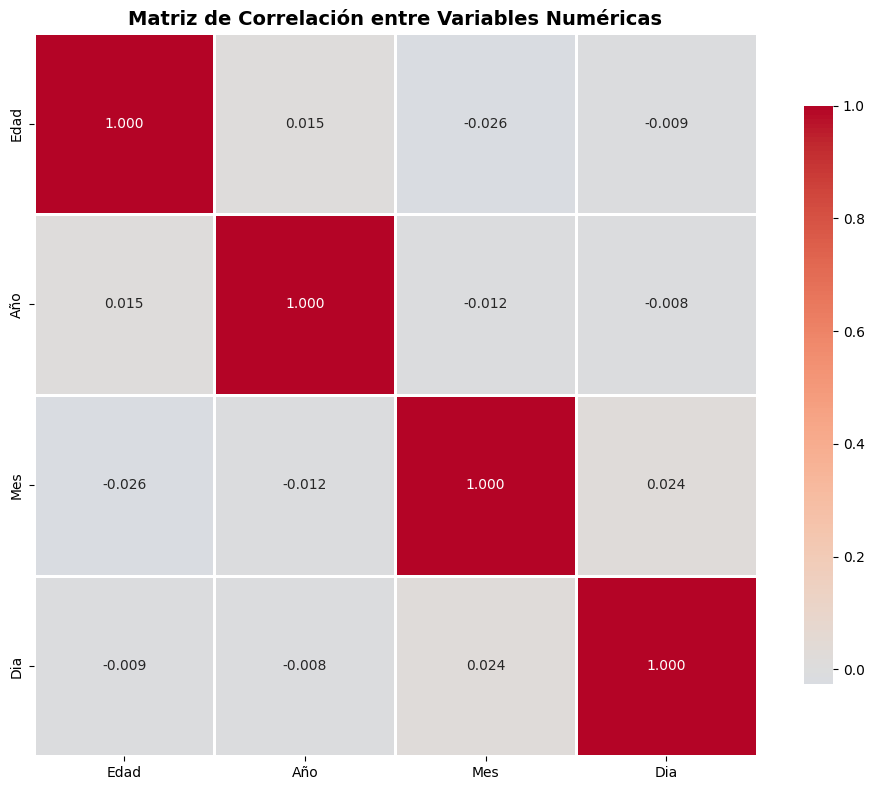

In [141]:

# Matriz de correlación para variables numéricas
variables_numericas = df_clean[['Edad', 'Año', 'Mes', 'Dia']].corr()

print("=" * 60)
print("MATRIZ DE CORRELACIÓN")
print("=" * 60)
print(variables_numericas)

# Gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(variables_numericas, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Tendencia Temporal: Registros por Mes

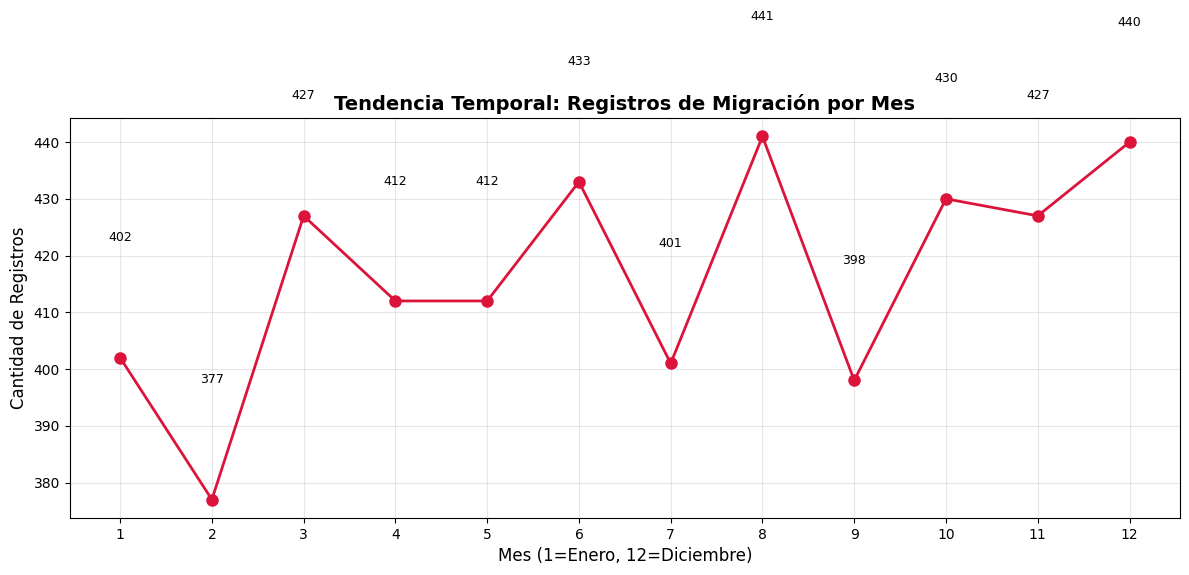

In [142]:
# Tendencia temporal: Registros por mes (promedio por mes)
registros_mes = df_clean.groupby('Mes').size()

plt.figure(figsize=(12, 6))
plt.plot(registros_mes.index, registros_mes.values, marker='o', linewidth=2, markersize=8, color='crimson')
plt.title('Tendencia Temporal: Registros de Migración por Mes', fontsize=14, fontweight='bold')
plt.xlabel('Mes (1=Enero, 12=Diciembre)', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(range(1, 13))

# Agregar valores en los puntos
for mes, cantidad in registros_mes.items():
    plt.text(mes, cantidad + 20, str(cantidad), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Top 10 Ciudades con más Registros de Migración


**Parámetros del Gráfico:**
- **Eje X:** Cantidad de Migrantes (Variable Dependiente)
- **Eje Y:** Ciudad (Variable Independiente)

**Hipótesis:** Las ciudades principales (Bogotá, Medellín, Cali) concentran la mayor cantidad de registros de migración debido a su mayor capacidad de absorción laboral y servicios.

**Fórmula utilizada en el código:**
```python
# Frecuencia: contar registros por ciudad
top_ciudades = df_clean['Ciudad'].value_counts().head(10)

# Proporción: (cantidad / total) × 100
porcentaje = (cantidad / len(df_clean)) * 100
```


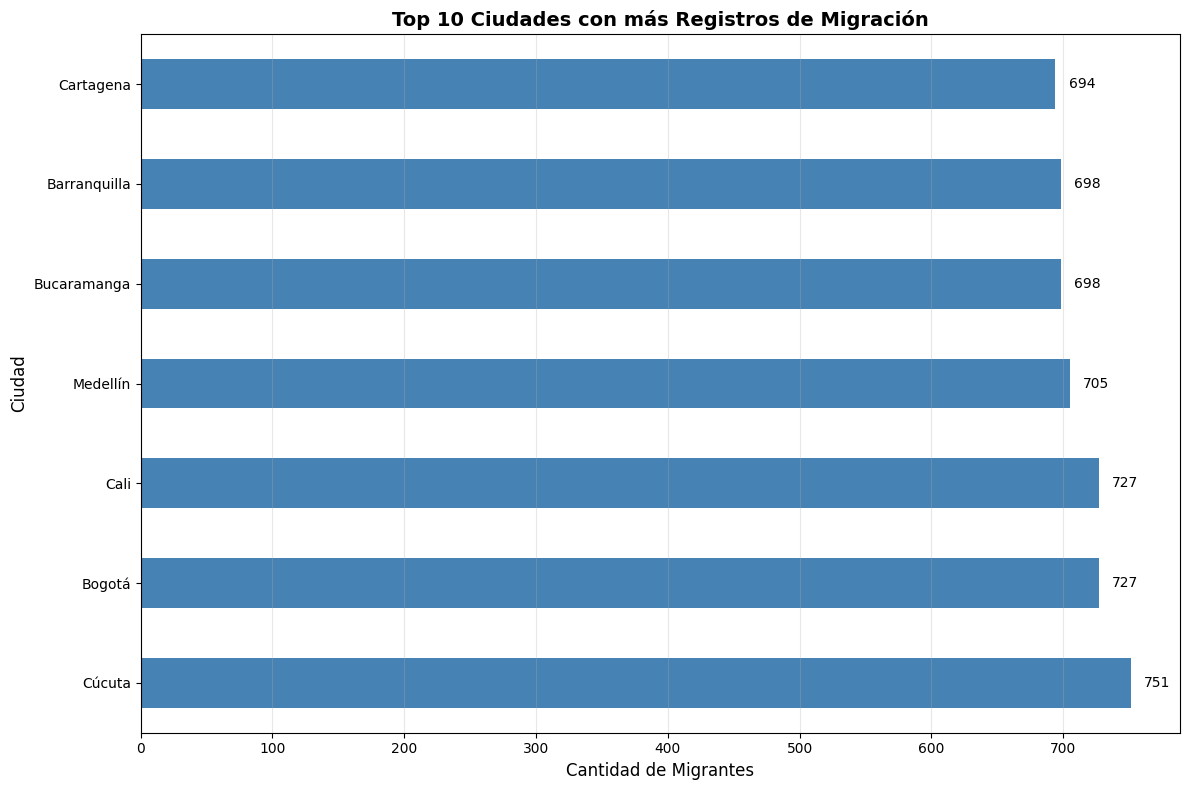

In [143]:
# Top 10 Ciudades con más registros
top_ciudades = df_clean['Ciudad'].value_counts().head(10)

plt.figure(figsize=(12, 8))
top_ciudades.plot(kind='barh', color='steelblue')
plt.title('Top 10 Ciudades con más Registros de Migración', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Migrantes', fontsize=12)
plt.ylabel('Ciudad', fontsize=12)
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(top_ciudades.values):
    plt.text(v + 10, i, str(v), va='center')
plt.tight_layout()
plt.show()


### Distribución de Migrantes por Nacionalidad


**Parámetros del Gráfico:**
- **Eje X:** Nacionalidad (Variable Independiente)
- **Eje Y:** Frecuencia - Cantidad de Migrantes (Variable Dependiente)

**Hipótesis:** Venezuela presenta la mayor frecuencia debido a la crisis migratoria reciente. La distribución refleja patrones históricos y geográficos de migración hacia Colombia.

**Fórmula utilizada en el código:**
```python
# Frecuencia: sumar registros por nacionalidad
nacionalidad_counts = df_clean['Nacionalidad'].value_counts()

# Proporción: (frecuencia / total) × 100
proporcion = (frecuencia_nacionalidad / len(df_clean)) * 100
```


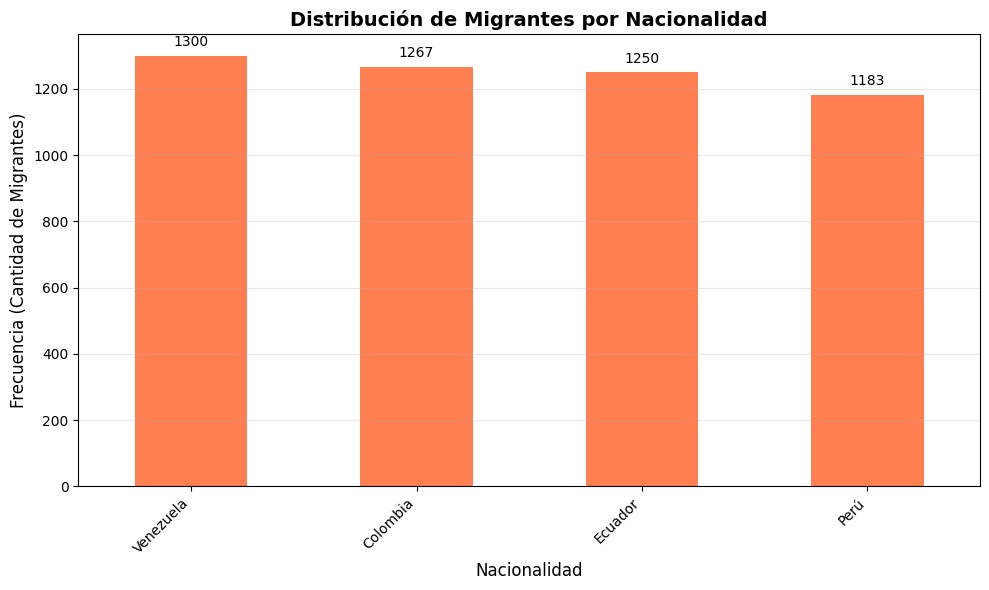

In [144]:
# Distribución por Nacionalidad
nacionalidad_counts = df_clean['Nacionalidad'].value_counts()

plt.figure(figsize=(10, 6))
nacionalidad_counts.plot(kind='bar', color='coral')
plt.title('Distribución de Migrantes por Nacionalidad', fontsize=14, fontweight='bold')
plt.xlabel('Nacionalidad', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de Migrantes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(nacionalidad_counts.values):
    plt.text(i, v + 20, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()


### Distribución de Migrantes por Grupo de Edad


**Parámetros del Gráfico:**
- **Eje X:** Grupo de Edad (Variable Independiente)
- **Eje Y:** Frecuencia - Cantidad de Migrantes (Variable Dependiente)

**Hipótesis:** El grupo de edad 19-30 años presenta mayor frecuencia, seguido de 31-50 años, indicando que la migración laboral activa es predominante en población joven y adulta.

**Fórmula utilizada en el código:**
```python
# Crear grupos de edad usando pd.cut()
df_clean['Grupo_Edad'] = pd.cut(df_clean['Edad'], bins=[0, 18, 30, 50, 70, 120],
                                labels=['0-18', '19-30', '31-50', '51-70', '71+'])

# Frecuencia por grupo: contar registros en cada rango
grupo_edad_counts = df_clean['Grupo_Edad'].value_counts().sort_index()
```


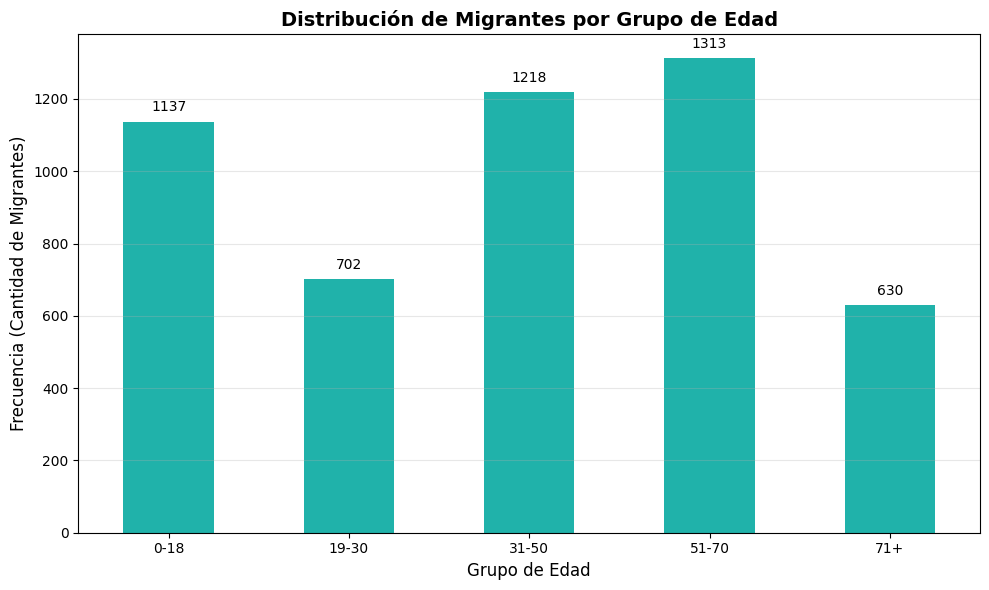

In [145]:
# Crear grupos de edad
df_clean['Grupo_Edad'] = pd.cut(df_clean['Edad'], bins=[0, 18, 30, 50, 70, 120],
                                labels=['0-18', '19-30', '31-50', '51-70', '71+'])

# Distribución por Grupo de Edad
grupo_edad_counts = df_clean['Grupo_Edad'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
grupo_edad_counts.plot(kind='bar', color='lightseagreen')
plt.title('Distribución de Migrantes por Grupo de Edad', fontsize=14, fontweight='bold')
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de Migrantes)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(grupo_edad_counts.values):
    plt.text(i, v + 20, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()


### Histograma de Registros de Migración por Año


**Parámetros del Gráfico:**
- **Eje X:** Año (Variable Independiente)
- **Eje Y:** Frecuencia - Cantidad de Registros (Variable Dependiente)
- **Altura de barras:** Frecuencia de registros por año

**Hipótesis:** Se observa una tendencia creciente en los registros de migración a lo largo de los años, posiblemente relacionada con eventos socioeconómicos y políticas migratorias.

**Fórmula utilizada en el código:**
```python
# Extraer año de la fecha
df_clean['Año'] = df_clean['Fecha_registro'].dt.year

# Frecuencia por año: contar registros en cada año
registros_año = df_clean['Año'].value_counts().sort_index()
```


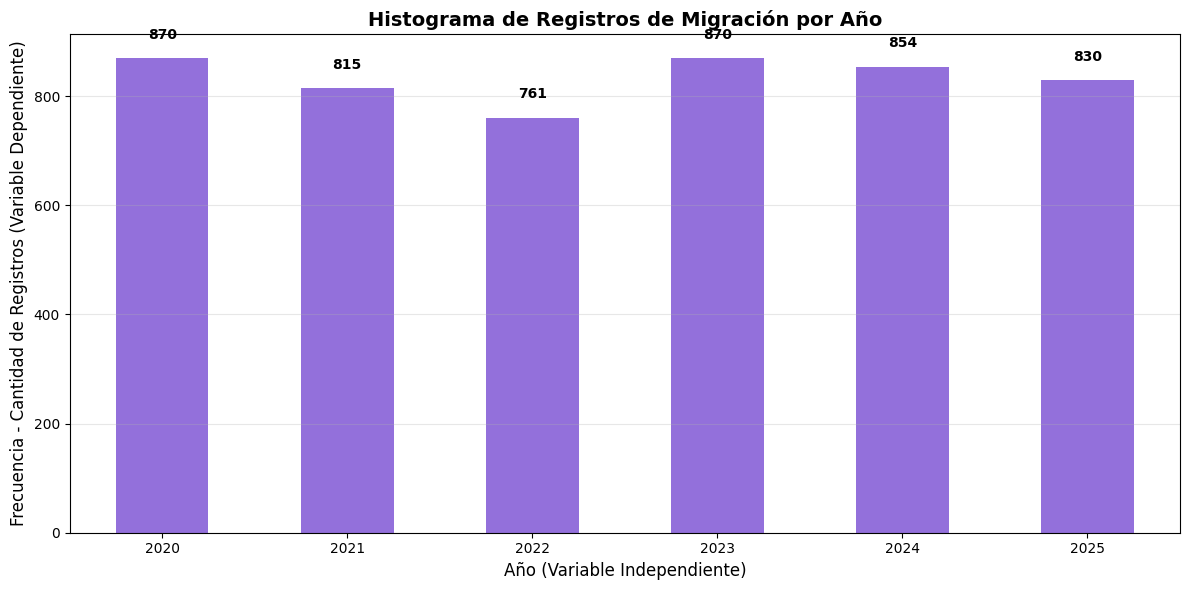

In [146]:
# Histograma de registros por año
registros_año = df_clean['Año'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
registros_año.plot(kind='bar', color='mediumpurple')
plt.title('Histograma de Registros de Migración por Año', fontsize=14, fontweight='bold')
plt.xlabel('Año (Variable Independiente)', fontsize=12)
plt.ylabel('Frecuencia - Cantidad de Registros (Variable Dependiente)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(registros_año.values):
    plt.text(i, v + 30, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


### Cruce: Nacionalidad por Año


**Hipótesis:** La distribución de nacionalidades varía según el año, reflejando cambios en patrones migratorios, crisis regionales y políticas migratorias.

**Fórmula utilizada en el código:**
```python
# Tabla de contingencia: cruce entre Año y Nacionalidad
nacionalidad_año = pd.crosstab(df_clean['Año'], df_clean['Nacionalidad'])

# Frecuencia esperada (para análisis chi-cuadrado):
# Frecuencia_esperada = (Total_fila × Total_columna) / Total_general
```


<Figure size 1400x700 with 0 Axes>

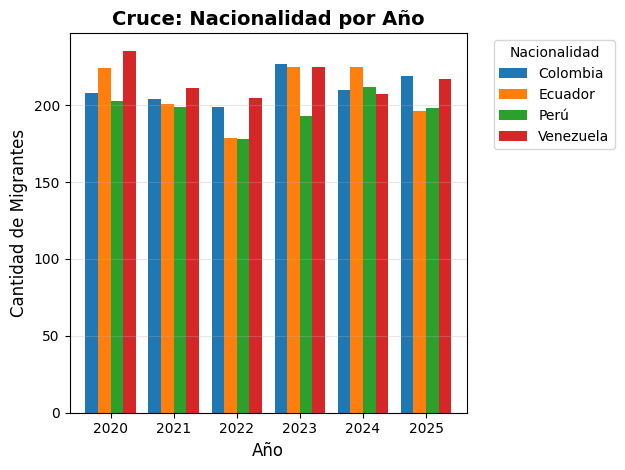

In [147]:
# Cruce: Nacionalidad por Año
nacionalidad_año = pd.crosstab(df_clean['Año'], df_clean['Nacionalidad'])

plt.figure(figsize=(14, 7))
nacionalidad_año.plot(kind='bar', stacked=False, width=0.8)
plt.title('Cruce: Nacionalidad por Año', fontsize=14, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Migrantes', fontsize=12)
plt.legend(title='Nacionalidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### Top 5 Ciudades por Nacionalidad


**Hipótesis:** Diferentes nacionalidades muestran preferencias por ciudades específicas, posiblemente relacionadas con redes migratorias, oportunidades laborales y proximidad geográfica.

**Fórmula utilizada en el código:**
```python
# Filtrar top 5 ciudades
top_5_ciudades = df_clean['Ciudad'].value_counts().head(5).index

# Tabla de contingencia: cruce entre Ciudad y Nacionalidad
ciudad_nacionalidad = pd.crosstab(df_top_ciudades['Ciudad'], df_top_ciudades['Nacionalidad'])
```


<Figure size 1400x700 with 0 Axes>

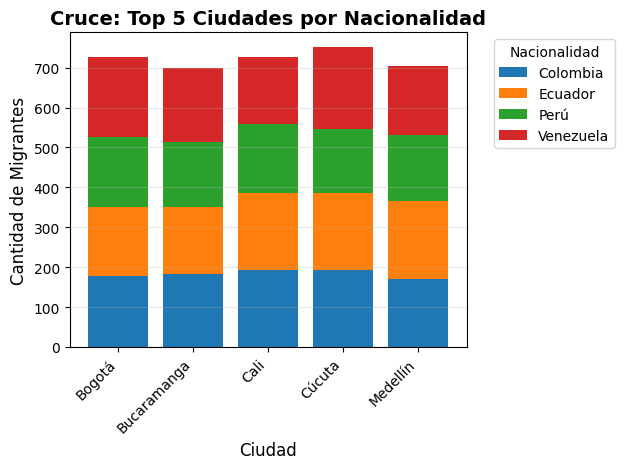

In [148]:
# Cruce: Ciudad por Nacionalidad (Top 5 ciudades)
top_5_ciudades = df_clean['Ciudad'].value_counts().head(5).index
df_top_ciudades = df_clean[df_clean['Ciudad'].isin(top_5_ciudades)]
ciudad_nacionalidad = pd.crosstab(df_top_ciudades['Ciudad'], df_top_ciudades['Nacionalidad'])

plt.figure(figsize=(14, 7))
ciudad_nacionalidad.plot(kind='bar', stacked=True, width=0.8)
plt.title('Cruce: Top 5 Ciudades por Nacionalidad', fontsize=14, fontweight='bold')
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Cantidad de Migrantes', fontsize=12)
plt.legend(title='Nacionalidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### Frontera de Ingreso por Nacionalidad


**Hipótesis:** Cada nacionalidad utiliza principalmente fronteras específicas según su ubicación geográfica y rutas migratorias tradicionales.

**Fórmula utilizada en el código:**
```python
# Tabla de contingencia: cruce entre Frontera y Nacionalidad
frontera_nacionalidad = pd.crosstab(df_clean['Frontera'], df_clean['Nacionalidad'])
```


<Figure size 1400x700 with 0 Axes>

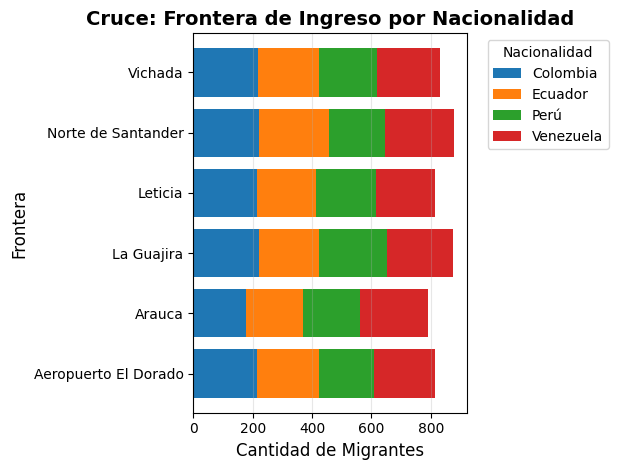

In [149]:
# Cruce: Frontera por Nacionalidad
frontera_nacionalidad = pd.crosstab(df_clean['Frontera'], df_clean['Nacionalidad'])

plt.figure(figsize=(14, 7))
frontera_nacionalidad.plot(kind='barh', stacked=True, width=0.8)
plt.title('Cruce: Frontera de Ingreso por Nacionalidad', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Migrantes', fontsize=12)
plt.ylabel('Frontera', fontsize=12)
plt.legend(title='Nacionalidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


### Distribución de Edades


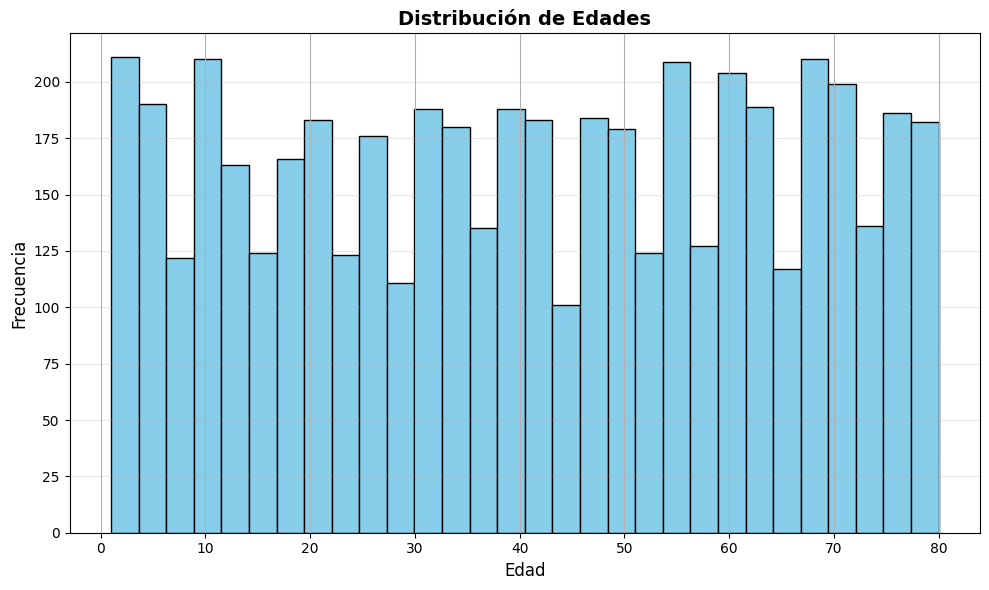

In [150]:
# Distribución de edades (histograma)
plt.figure(figsize=(10, 6))
df_clean['Edad'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades', fontsize=14, fontweight='bold')
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## Distribución por Frontera de Ingreso


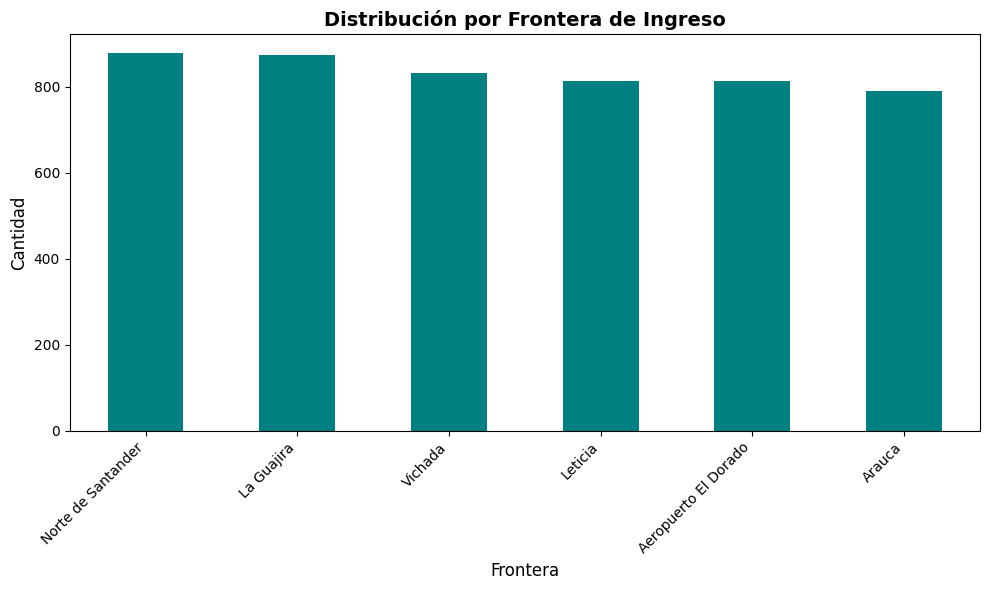

In [151]:
# Fronteras más utilizadas
fronteras = df_clean['Frontera'].value_counts()

plt.figure(figsize=(10, 6))
fronteras.plot(kind='bar', color='teal')
plt.title('Distribución por Frontera de Ingreso', fontsize=14, fontweight='bold')
plt.xlabel('Frontera', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Estadística Descriptiva


### Resumen General de los Datos


In [152]:
# Frecuencia de cada categoría
print("=" * 60)
print("FRECUENCIAS POR CATEGORÍA")
print("=" * 60)

print("\n1. Nacionalidad:")
print(df_clean['Nacionalidad'].value_counts())

print("\n2. Ciudad de Destino:")
print(df_clean['Ciudad'].value_counts().head(10))

print("\n3. Frontera de Ingreso:")
print(df_clean['Frontera'].value_counts())


print("\n4. Grupos de Edad (rangos):")
df_clean['Grupo_Edad'] = pd.cut(df_clean['Edad'], bins=[0, 18, 30, 50, 70, 120],
                                labels=['0-18', '19-30', '31-50', '51-70', '71+'])
print(df_clean['Grupo_Edad'].value_counts().sort_index())



FRECUENCIAS POR CATEGORÍA

1. Nacionalidad:
Nacionalidad
Venezuela    1300
Colombia     1267
Ecuador      1250
Perú         1183
Name: count, dtype: int64

2. Ciudad de Destino:
Ciudad
Cúcuta          751
Bogotá          727
Cali            727
Medellín        705
Bucaramanga     698
Barranquilla    698
Cartagena       694
Name: count, dtype: int64

3. Frontera de Ingreso:
Frontera
Norte de Santander      878
La Guajira              874
Vichada                 831
Leticia                 814
Aeropuerto El Dorado    813
Arauca                  790
Name: count, dtype: int64

4. Grupos de Edad (rangos):
Grupo_Edad
0-18     1137
19-30     702
31-50    1218
51-70    1313
71+       630
Name: count, dtype: int64


## Crear archivo ZIP con todos los gráficos


In [155]:
# Crear archivo ZIP con todos los gráficos
nombre_zip = 'graficos_migracion.zip'
with ZipFile(nombre_zip, 'w') as zipf:
    for archivo in archivos_graficos:
        ruta_completa = os.path.join(directorio_graficos, archivo)
        if os.path.exists(ruta_completa):
            zipf.write(ruta_completa, archivo)
            print(f"Agregado al ZIP: {archivo}")

print(f"\nArchivo ZIP creado: {nombre_zip}")
print(f"Total de archivos en el ZIP: {len(archivos_graficos)}")

# Descargar el archivo ZIP
files.download(nombre_zip)
print("\nArchivo ZIP descargado exitosamente")


Agregado al ZIP: 01_top_10_ciudades.png
Agregado al ZIP: 02_distribucion_nacionalidad.png
Agregado al ZIP: 03_distribucion_grupo_edad.png
Agregado al ZIP: 04_histograma_registros_por_año.png
Agregado al ZIP: 05_nacionalidad_por_año.png
Agregado al ZIP: 06_ciudad_por_nacionalidad.png
Agregado al ZIP: 07_frontera_por_nacionalidad.png
Agregado al ZIP: 08_matriz_correlacion.png
Agregado al ZIP: 09_diagrama_dispersion_edad_año.png
Agregado al ZIP: 10_tendencia_temporal_mes.png

Archivo ZIP creado: graficos_migracion.zip
Total de archivos en el ZIP: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Archivo ZIP descargado exitosamente


### **Resumen Final**

El análisis permitió transformar un conjunto de datos migratorios desordenado en un dataset limpio, estructurado y confiable. Se corrigieron duplicados, se estandarizaron fechas y se organizaron variables clave, lo que mejoró la calidad y la utilidad del archivo. Además, se exploraron distribuciones básicas y se evaluaron relaciones entre variables numéricas mediante una matriz de correlación, confirmando que no existen dependencias lineales significativas entre edad y componentes temporales. Todo este proceso no solo permitió entender mejor el comportamiento del flujo migratorio, sino que también dio valor a los datos, ya que ahora son más interpretables, consistentes y adecuados para análisis más profundos y para la toma de decisiones informadas.
